# Chapter 8: Statistics: Modelling Data

The first example involves a simulated data set of finding the time for an object to drop a certain distance. We generated a fake data set of "drop times" that are normally distributed about their expected value with an 0.5s offset (which will show up as a systematic non zero value of the offset in the fit). 


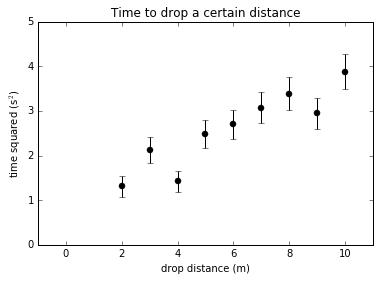

In [5]:
import numpy as np
from math import *
import pylab as pl
%matplotlib inline

#Drop distances:
xi=np.arange(1,11) 
#Random error in the time measurements
sigma_t=0.1
#Generate random times (note the 0.5 offset)
ti=np.random.normal(0.5+np.sqrt(xi*2.0/9.81),sigma_t)
#Square them:
ti2=ti*ti
#Get the error in the squared time
sigma_t2=2*ti*sigma_t

#Plot them:
pl.errorbar(xi[1:], ti2[1:], yerr=sigma_t2[1:],fmt='o',color='black')
pl.xlabel("drop distance (m)")
pl.ylabel("time squared (s$^2$)")
pl.title("Time to drop a certain distance")
pl.axis([-1,11,0,5])
pl.show()

Of course, everytime you run the above code, you get a different set of random data. We ran it once to get the data that we put in Table 8.1, so below we hard code reading the data from the table for example 8.1

Probability to get g 2.2 sigma or further from accepted value: 0.027


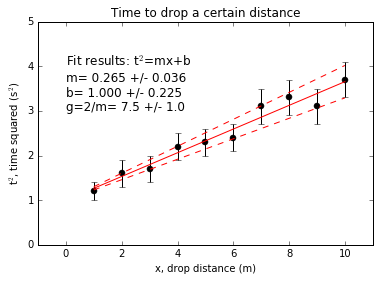

In [2]:
#Example 8.1
import numpy as np
from math import *
import pylab as pl
import scipy.stats as stats


#Copy and paste data from the table in the notes, add commas:
datalist=[
1.0, 1.1, 0.1, 1.2, 0.2,
2.0, 1.3, 0.1, 1.6, 0.3,
3.0, 1.3, 0.1, 1.7, 0.3,
4.0, 1.5, 0.1, 2.2, 0.3,
5.0, 1.5, 0.1, 2.3, 0.3,
6.0, 1.6, 0.1, 2.4, 0.3,
7.0, 1.8, 0.1, 3.1, 0.4,
8.0, 1.8, 0.1, 3.3, 0.4,
9.0, 1.8, 0.1, 3.1, 0.4,
10.0, 1.9, 0.1, 3.7, 0.4,
]
#convert this to a numpy array, and change the shape
data=np.array(datalist)
data=data.reshape(10,5) #changes the shape to get the data in the same format as table
#Get the colums out of the table:
x=data[:,0]#This is the first column of data (x)
t2=data[:,3]#The 4th column (t^2)
sigma_t2=data[:,4] #The 5th colum, sigma_t^2

#calculate the slope and offset
#start by calculating all of the sums
N=x.size
x2sum=(x*x).sum()
xt2sum=(x*t2).sum()
xsum=x.sum()
t2sum=t2.sum()

#We will use the mean value of the sigma_t2 as the "error in y"
denominator=N*x2sum-xsum**2
#slope:
m=(N*xt2sum-xsum*t2sum)/denominator
sigma_m=sigma_t2.mean()*sqrt(N/denominator)# using mean error in t^2
#offset:
b=(x2sum*t2sum-xsum*xt2sum)/denominator
sigma_b=sigma_t2.mean()*sqrt(x2sum/denominator)# using mean error in t^2

gmeas=2.0/m
sigma_g=2/m/m*sigma_m

#The fit results
text='''Fit results: t$^2$=mx+b
m= {:.3f} +/- {:.3f}
b= {:.3f} +/- {:.3f}
g=2/m= {:.1f} +/- {:.1f}'''.format(m,sigma_m,b,sigma_b,gmeas,sigma_g)

#calculate probability of obtaining a value this far away from the accepted value
dsigma=(9.81-gmeas)/sigma_g
prob=2.0*stats.norm.sf(dsigma)
print("Probability to get g {:.1f} sigma or further from accepted value: {:.3f}".format(dsigma,prob))

#plot:
#The data:
pl.errorbar(x,t2,yerr=sigma_t2,fmt='o',color='black')
#The fit:
pl.plot(x,m*x+b,color='red')
#The fit with m+/-sigma_c
pl.plot(x,(m+sigma_m)*x+b,'--',color='red')
pl.plot(x,(m-sigma_m)*x+b,'--',color='red')

pl.text(0,3,text,fontsize=12)#fit results onto the plot
pl.xlabel("x, drop distance (m)")
pl.ylabel("t$^2$, time squared (s$^2$)")
pl.title("Time to drop a certain distance")
pl.axis([-1,11,0,5])
pl.show()


We then plot the residuals:

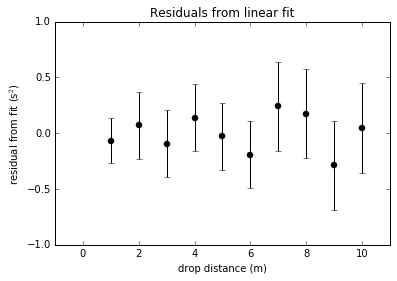

In [3]:
#Plot the residuals for the above plot:
#The residuals have the same error bars:
pl.errorbar(x,t2-(m*x+b),yerr=sigma_t2,fmt='o',color='black')
pl.xlabel("drop distance (m)")
pl.ylabel("residual from fit (s$^2$)")
pl.title("Residuals from linear fit")
pl.axis([-1,11,-1,1])
pl.show()

And then studied how the actual chi-squared changes as a function of the parameters (m and b) of the fit

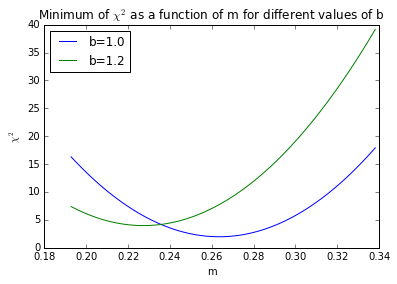

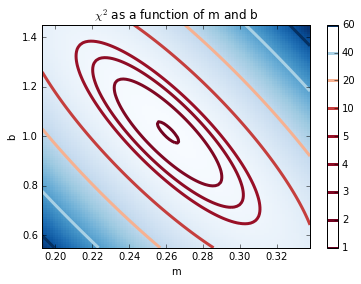

In [4]:
#Calculate the chi-squared for example 8.1

#A function to calculate chi-squared for a given set of data, errors on data, and model predictions
def chis(ydata,sigma_y,ymodel):
    return (((ydata-ymodel)/sigma_y)**2).sum()

ydata=t2
sigma_y=sigma_t2

#an array of values of b and m centered around the best fit value:
b_vals=np.linspace(b-2*sigma_b,b+2*sigma_b,100)
m_vals=np.linspace(m-2*sigma_m,m+2*sigma_m,100)
    
#Plot the chi-squared vs m, for 2 different values of b    
pl.plot(m_vals,[chis(ydata,sigma_y,m_vals[i]*x+b) for i in range(m_vals.size)],label="b={:.1f}".format(b))
pl.plot(m_vals,[chis(ydata,sigma_y,m_vals[i]*x+(b+sigma_b)) for i in range(m_vals.size)],label="b={:.1f}".format(b+sigma_b))
pl.legend(loc='best')
pl.xlabel('m')
pl.ylabel('$\chi^2$')
pl.title('Minimum of $\chi^2$ as a function of m for different values of b')
pl.show()

#Make a 2D plot of chi-squared vs m and b:
mm,bb=np.meshgrid(m_vals,b_vals)
chi2d=pl.zeros(mm.shape)
for i in range(m_vals.size):
    for j in range(b_vals.size):
        chi2d[i,j]=chis(ydata,sigma_y,m_vals[i]*x+b_vals[j])
pl.pcolormesh(mm,bb,chi2d,cmap='Blues',alpha=1)
pl.axis([m_vals.min(),m_vals.max(),b_vals.min(),b_vals.max()])
pl.contour(mm,bb,chi2d,levels=[1,2,3,4,5,10,20,40,60],cmap='RdBu',linewidths=3)
pl.xlabel('m')
pl.ylabel('b')
pl.title("$\chi^2$ as a function of m and b")
pl.colorbar()
pl.show()
